# Heart Attack Analysis - SHAP explanations of a tree-based model

## Task A

For the selected models, prepare a knitr/jupyter notebook based on the following points (you can use models created in Homework 1).
Submit your results on GitHub to the directory `Homeworks/HW2`.

1. Train a tree-based ensemble model on the selected dataset; it can be one of random forest, GBM, CatBoost, XGBoost, LightGBM (various types) etc.
2. Select two observations from the dataset and calculate the model's prediction.
3. Next, for the same observations, calculate the decomposition of predictions, so-called variable attributions, using SHAP from two packages of choice, e.g. for Python: `dalex` and `shap`, for R: `DALEX` and `iml`.
4. Find any two observations in the dataset, such that they have different variables of the highest importance, e.g. age and gender have the highest (absolute) attribution for observation A, but race and class are more important for observation B.
5. (If possible) Select one variable X and find two observations in the dataset such that for one observation, X has a positive attribution, and for the other observation, X has a negative attribution.
6. (How) Do the results differ across the two packages selected in point (3)?
7. (Using one explanation package of choice) Train another model of any class: neural network, linear model, decision tree etc. and find an observation for which SHAP attributions are different between this model and the one trained in point (1).
8. Comment on the results obtained in points (4)-(7)

## Task B

Calculate Shapley values for player A given the following value function

```
v() = 0
v(A) = 20
v(B) = 20
v(C) = 60
v(A,B) = 60
v(A,C) = 70
v(B,C) = 70
v(A,B,C) = 100
```

## A.1. Train a tree-based ensemble model on the selected dataset; it can be one of random forest, GBM, CatBoost, XGBoost, LightGBM (various types) etc.

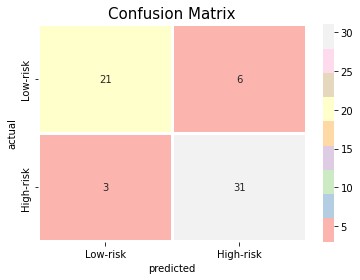

Precision: 0.838 
Recall: 0.912 
F1: 0.873 
Accuracy: 85.246 %
MSE: 0.148


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


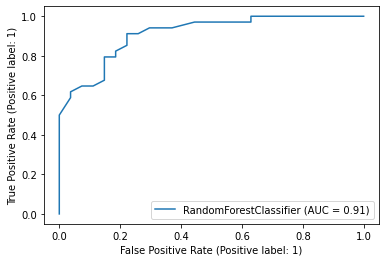

In [11]:
# Fix the rng
np.random.seed(2137)

model = train_and_evaluate_model(RandomForestClassifier(random_state=69))

## A.2. Select two observations from the dataset and calculate the model's prediction.

In [38]:
import shap

chosen_indices = [0, 1]

test_subset, label = test_ds.iloc[chosen_indices], y_test.iloc[chosen_indices]
preds = model.predict_proba(test_subset) 

preds

array([[0.49, 0.51],
       [0.64, 0.36]])

In [35]:
label

25     1
239    0
Name: output, dtype: int64

We see that our two chosen examples have different labels, which might be important in further analysis.

## A.3. Next, for the same observations, calculate the decomposition of predictions, so-called variable attributions, using SHAP from two packages of choice, e.g. for Python: dalex and shap, for R: DALEX and iml.

### Explanations from the `shap` package

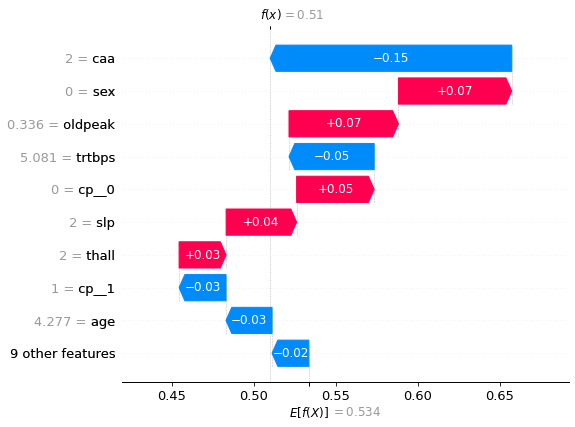

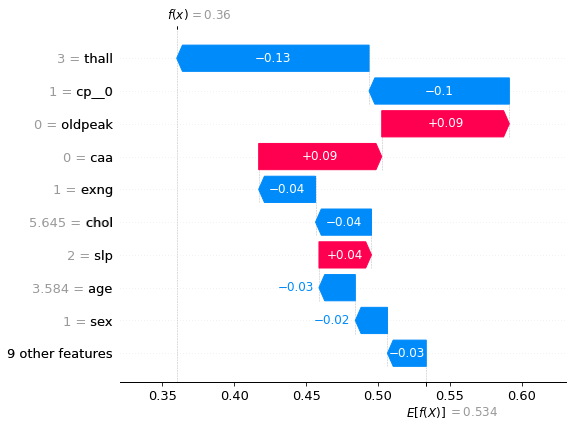

### Explanations provided by the `dalex` package

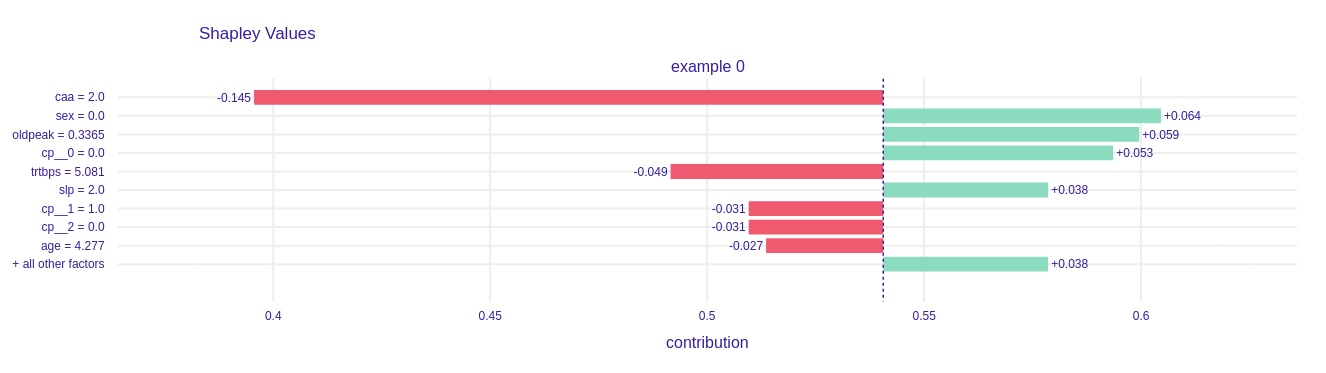

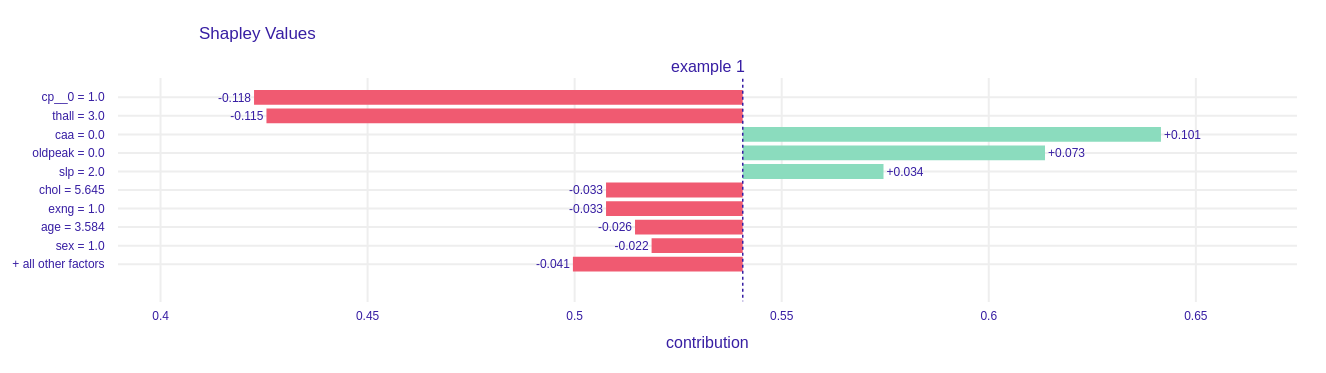

## A.4. Find any two observations in the dataset, such that they have different variables of the highest importance, e.g. age and gender have the highest (absolute) attribution for observation A, but race and class are more important for observation B.

We can already see that in two observations chosen above. For the first observation, the most important variables are `caa` and `sex`, and for the second one the most important are `cp__0` and `thall`. 

## A.5. Select one variable X and find two observations in the dataset such that for one observation, X has a positive attribution, and for the other observation, X has a negative attribution.

Again, for variable `caa` we see that it contributes negatively to the first example score, and positively for the score of the second example. 

Note that `caa` denotes number of major vessels and the value in the first case is `2` and in the second case `0`. So small number of vessels increases the risk of heart attack, which makes our explanation reasonable from the domain perspective.

## A.6. (How) Do the results differ across the two packages selected in point (3)?

The difference between explanations predicted by `dalex` and `shap` are rather small - for the most important variables, the difference in attribution is generally not greater than `1`. For the second example differences are bigger, in particular, the two most important variables are in different order. These differences are generally small and shouldn't impact our analysis. 


Note that we might have used different algorithms (TreeSHAP was used in `shap` and `dalex` automatically chooses an algorithm). 



## A.7. (Using one explanation package of choice) Train another model of any class: neural network, linear model, decision tree etc. and find an observation for which SHAP attributions are different between this model and the one trained in point (1).

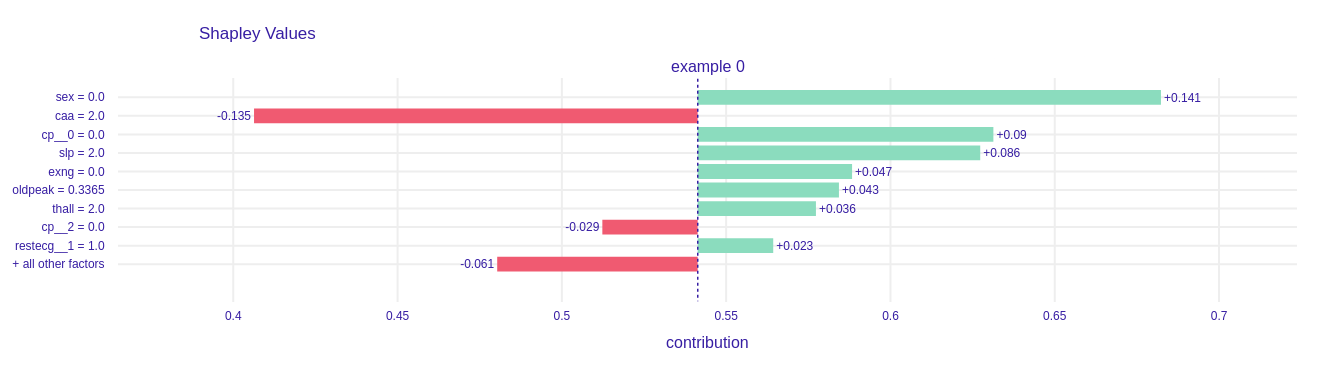

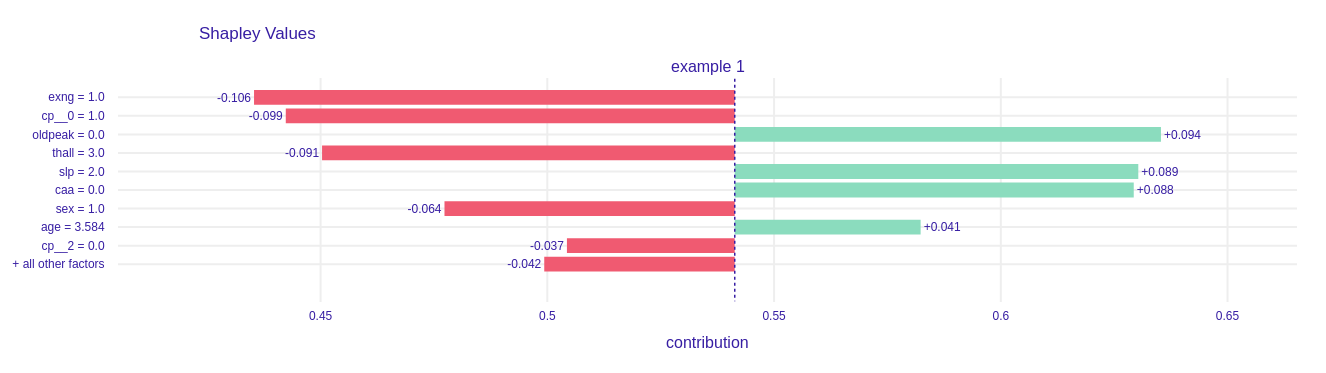

We train a logistic regression model from the previous homework, anticipating it might use different features than the random forest model. 

Indeed, if we look at the first example, we already see that top1 variables changed place: `sex` in the logistic regression vs. `caa` in the random forest - `sex` variable seems to be much more important for the logistic regression ($0.141$) but less in the random forest ($0.064$). 

In the second example the situation is even more extreme - `exng` variables is the most important with attribution of $-0.106$, meanwhile in the random forest it attributed only $-0.033$. 

In general, there is a reasonable overlap between top5 variables for these models. The attributions also have the same sign for the same examples between different models, which makes our explanations sensible.

## A.8. Comment on the results obtained in points (4)-(7)

In general, we see that explanations are consistent between packages, and also reasonably consistent across two different models. After manually inspecting, most of the important features predicted by the models are likely to be important, judged by common sense and basic knowledge about the problem. 

One conclusion that comes from the comparison between explanations for the random forest and logistic regression models is that these explanations can differ between models, and are heavily dependent on the model and less on the dataset. Though, this is what we mostly care about after training the model. Also it should give us some insight about the dataset as well, if we average shapley values across more examples like explained on the lecture. 

## Task B

Calculate Shapley values for player A given the following value function

```
v() = 0
v(A) = 20
v(B) = 20
v(C) = 60
v(A,B) = 60
v(A,C) = 70
v(B,C) = 70
v(A,B,C) = 100
```

We'll use the formula from the slides:

$$\phi_{A} = \frac{1}{6}(20 * 2 + 40 + 10 + 30 * 2) = 25$$
$$\phi_{B} = \frac{1}{6}(20 * 2 + 40 + 10 + 30 * 2) = 25$$
$$\phi_{C} = \frac{1}{6}(60 * 2 + 50 + 50 + 40 * 2) = 50$$

# Appendix

In [ ]:
# Download the dataset
!gdown --id 1NZWMlrVLLFcpeUxIUK8b5gG3DZ0qN3C2
!unzip heart_attack.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NZWMlrVLLFcpeUxIUK8b5gG3DZ0qN3C2
To: /content/heart_attack.zip
100% 4.21k/4.21k [00:00<00:00, 5.86MB/s]
Archive:  heart_attack.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [ ]:
!pip install shap
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.3 MB/s 
  Created wheel for dalex: filename=dalex-1.5.0-py3-none-any.whl size=1043321 sha256=8a5df57eb5103d7c5c3f998d3527d52d3e9b0793047729f2b5a00a731c781734
  Stored in directory: /root/.cache/pip/wheels/76/31/8c/c78df586df31b3f3e0c4ecc759ee73e175545cff5548201996
Successfully built dalex


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import plot_roc_curve

# Initial eyeballing over the data

We look at total number of examples (303) and also investigate balance of positive/negative class.

In [ ]:
ds = pd.read_csv('heart.csv')
print('Number of examples: ', len(ds))
ds.head()

Number of examples:  303


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Class balance

We can see that classes are pretty balanced so we don't have to apply any specific techniques for that

In [ ]:
ds.output.value_counts()

1    165
0    138
Name: output, dtype: int64

# Variables description

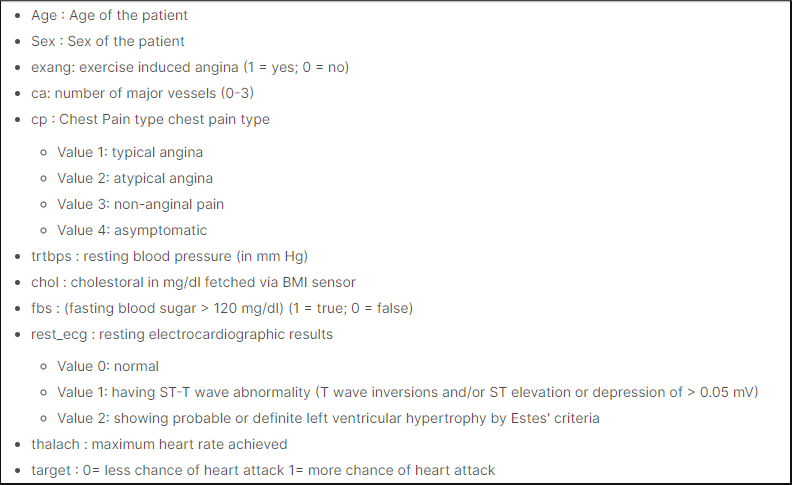

# Data preprocessing

We apply log transform to the numerical variables (so that they are more friendly for logistic regression-type models) and one-hot encoding for categorical variables.

In [ ]:
continuous_cols = ['age', 'chol','oldpeak', 'thalachh', 'trtbps']
categorical_cols = ['cp', 'restecg']

def categoricalize(df, columns):
    for col in columns:
        dummy_values = pd.get_dummies(df[col])
        for v in dummy_values.columns:
            df = pd.concat([df, dummy_values[v].rename(f'{col}__{v}')], axis=1)
    return df.drop(columns=columns)

processed_ds = categoricalize(ds, categorical_cols)

for col in continuous_cols:
    processed_ds[col] = np.log1p(ds[col])

x, y = processed_ds.drop(columns=['output']), processed_ds['output']

x_train, x_test, y_train, y_test=train_test_split(x, y,
                                               test_size=0.2,
                                               random_state=2139) 


train_ds = x_train
test_ds = x_test

# Metrics

For the binary classification we measure the following metrics:


*   Accuracy
*   Precision
*   Recall
*   F1
*   MSE

and also plot the confusion matrix



In [ ]:
def compute_metrics(y_pred, y_gt):
    cm=confusion_matrix(y_gt, y_pred)
    class_label = ["Low-risk", "High-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

    acc=accuracy_score(y_gt,y_pred)
    mse=mean_squared_error(y_gt,y_pred)
    precision, recall, fscore, train_support = score(y_gt, y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1: {} \nAccuracy: {} %\nMSE: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

def train_and_evaluate_model(model):
    model.fit(train_ds, y_train)
    y_pred = model.predict(test_ds)

    compute_metrics(y_pred, y_test)
    plot_roc_curve(model, test_ds, y_test)
    return model

## A.1. Train a tree-based ensemble model on the selected dataset; it can be one of random forest, GBM, CatBoost, XGBoost, LightGBM (various types) etc.

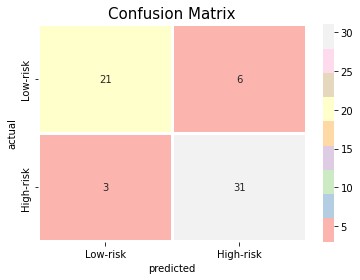

Precision: 0.838 
Recall: 0.912 
F1: 0.873 
Accuracy: 85.246 %
MSE: 0.148


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


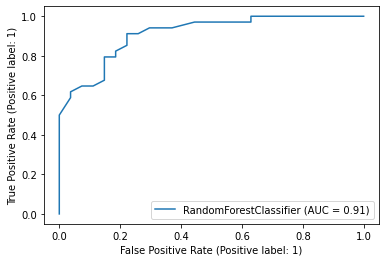

In [ ]:
# Fix the rng
np.random.seed(2137)

model = train_and_evaluate_model(RandomForestClassifier(random_state=69))

## A.2. Select two observations from the dataset and calculate the model's prediction.

In [ ]:
import shap

chosen_indices = [0, 1]

test_subset, label = test_ds.iloc[chosen_indices], y_test.iloc[chosen_indices]
preds = model.predict_proba(test_subset) 

preds

array([[0.49, 0.51],
       [0.64, 0.36]])

In [ ]:
label

25     1
239    0
Name: output, dtype: int64

We see that our two chosen examples have different labels, which might be important in further analysis.

## A.3. Next, for the same observations, calculate the decomposition of predictions, so-called variable attributions, using SHAP from two packages of choice, e.g. for Python: dalex and shap, for R: DALEX and iml.

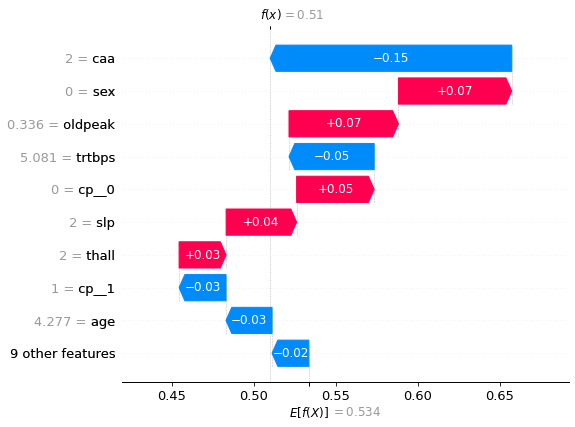

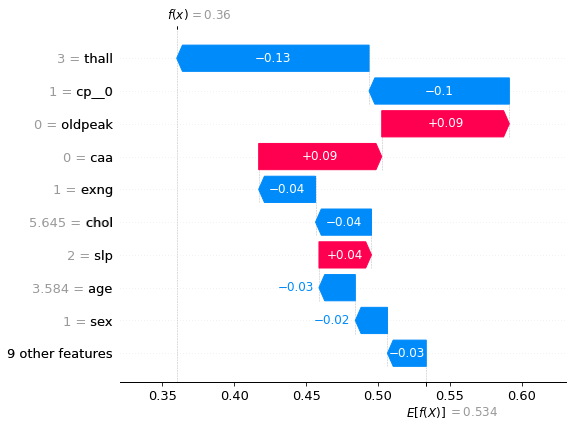

In [ ]:
shap_explainer = shap.explainers.Tree(model, data=train_ds, model_output="probability")
shap_values = shap_explainer(test_subset)

for v in shap_values:
    shap.plots.waterfall(v[:, 1])

In [ ]:
import dalex as dx

explainer = dx.Explainer(model, train_ds, y_train, label="RF")

Preparation of a new explainer is initiated

  -> data              : 242 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 242 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF
  -> predict function  : <function yhat_proba_default at 0x7f8a086a4680> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.541, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.36, mean = 0.000744, max = 0.33
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [ ]:
for i in range(len(test_subset)):
    explainer.predict_parts(test_subset.iloc[i], type="shap", label=f'example {i}').plot()

## A.4. Find any two observations in the dataset, such that they have different variables of the highest importance, e.g. age and gender have the highest (absolute) attribution for observation A, but race and class are more important for observation B.

We can already see that in two observations chosen above. For the first observation, the most important variables are `caa` and `sex`, and for the second one the most important are `cp__0` and `thall`. 

## A.5. Select one variable X and find two observations in the dataset such that for one observation, X has a positive attribution, and for the other observation, X has a negative attribution.

Again, for variable `caa` we see that it contributes negatively to the first example score, and positively for the score of the second example. 

Note that `caa` denotes number of major vessels and the value in the first case is `2` and in the second case `0`. So small number of vessels increases the risk of heart attack, which makes our explanation reasonable from the domain perspective.

## A.6. (How) Do the results differ across the two packages selected in point (3)?

The difference between explanations predicted by `dalex` and `shap` are rather small - for the most important variables, the difference in attribution is generally not greater than `1`. For the second example differences are bigger, in particular, the two most important variables are in different order. These differences are generally small and shouldn't impact our analysis. 


Note that we might have used different algorithms (TreeSHAP was used in `shap` and `dalex` automatically chooses an algorithm). 



## A.7. (Using one explanation package of choice) Train another model of any class: neural network, linear model, decision tree etc. and find an observation for which SHAP attributions are different between this model and the one trained in point (1).

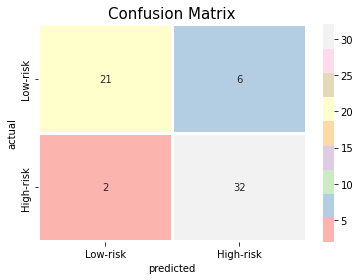

Precision: 0.842 
Recall: 0.941 
F1: 0.889 
Accuracy: 86.885 %
MSE: 0.131
Preparation of a new explainer is initiated

  -> data              : 242 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 242 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : LogReg
  -> predict function  : <function yhat_proba_default at 0x7f8a086a4680> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00561, mean = 0.541, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.968, mean = 1.64e-06, max = 0.928
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



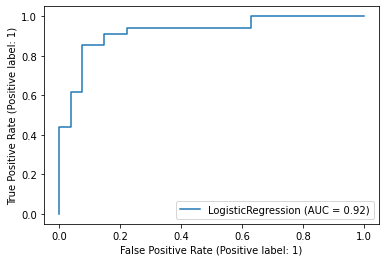

In [ ]:
reg_model = train_and_evaluate_model(LogisticRegression(random_state=69, max_iter=1000))
reg_explainer = dx.Explainer(reg_model, train_ds, y_train, label="LogReg")

In [ ]:
for i in range(len(test_subset)):
    reg_explainer.predict_parts(test_subset.iloc[i], type="shap", label=f'example {i}').plot()

We train a logistic regression model from the previous homework, anticipating it might use different features than the random forest model. 

Indeed, if we look at the first example, we already see that top1 variables changed place: `sex` in the logistic regression vs. `caa` in the random forest - `sex` variable seems to be much more important for the logistic regression ($0.141$) but less in the random forest ($0.064$). 

In the second example the situation is even more extreme - `exng` variables is the most important with attribution of $-0.106$, meanwhile in the random forest it attributed only $-0.033$. 

In general, there is a reasonable overlap between top5 variables for these models. The attributions also have the same sign for the same examples between different models, which makes our explanations sensible.

## A.8. Comment on the results obtained in points (4)-(7)

In general, we see that explanations are consistent between packages, and also reasonably consistent across two different models. After manually inspecting, most of the important features predicted by the models are likely to be important, judged by common sense and basic knowledge about the problem. 

One conclusion that comes from the comparison between explanations for the random forest and logistic regression models is that these explanations can differ between models, and are heavily dependent on the model and less on the dataset. Though, this is what we mostly care about after training the model. Also it should give us some insight about the dataset as well, if we average shapley values across more examples like explained on the lecture. 

## Task B

Calculate Shapley values for player A given the following value function

```
v() = 0
v(A) = 20
v(B) = 20
v(C) = 60
v(A,B) = 60
v(A,C) = 70
v(B,C) = 70
v(A,B,C) = 100
```

In [54]:
!jupyter nbconvert --to=html xai_hw2_st.ipynb

[NbConvertApp] Converting notebook xai_hw2_st.ipynb to html
[NbConvertApp] Writing 704852 bytes to xai_hw2_st.html
